Student Stress Monitioring Data

--> Check and understand the data and using some machine learning algorithms find if a student has stress or not 
credits: @article{ovi2025protecting,
  title={Protecting Student Mental Health with a Context-Aware Machine Learning Framework for Stress Monitoring},
  author={Ovi, Md Sultanul Islam and Hossain, Jamal and Rahi, Md Raihan Alam and Akter, Fatema},
  journal={arXiv preprint arXiv:2508.01105},
  year={2025}
}

# 1. Data Cleaning and PreProcessing

In [95]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
stress_data = pd.read_csv("/Users/dhanrajtentu/Downloads/Projects/wine quality/Student stress monitor/StressLevelDataset.csv")

In [97]:
# Preview some data
stress_data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [98]:
# Get some info on the data
stress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [99]:
stress_data.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [100]:
# Get the shape
stress_data.shape

(1100, 21)

In [101]:
# Check if there is any duplicated rows are there
stress_data.duplicated().sum()

np.int64(0)

In [102]:
# Get the summary Statastics
stress_data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [103]:
stress_data['stress_level'].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

In [104]:
# Create a new coulumn with stress level details
stress_map = { 0: "Eustress" , 1: "No Stress", 2: "Distress"}
stress_data['stress_level_label'] = stress_data['stress_level'].map(stress_map)
stress_data['stress_level_label'].value_counts()

stress_level_label
Eustress     373
Distress     369
No Stress    358
Name: count, dtype: int64

There are too many columns, after some visualisation and analysing which feature is important will be removing some of the columns

 # 2. Data Visulaisation

In [105]:
# view columns names
stress_data.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level',
       'stress_level_label'],
      dtype='object')

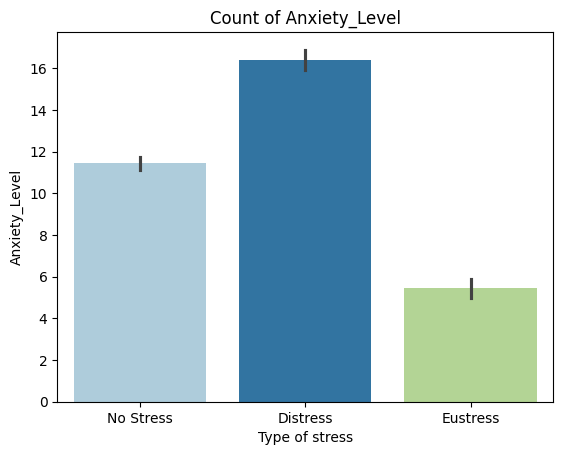

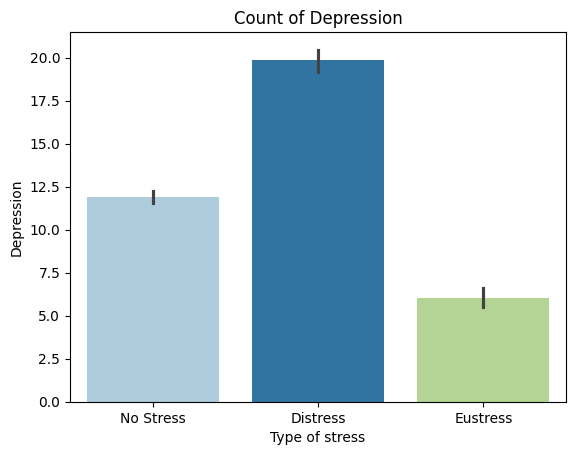

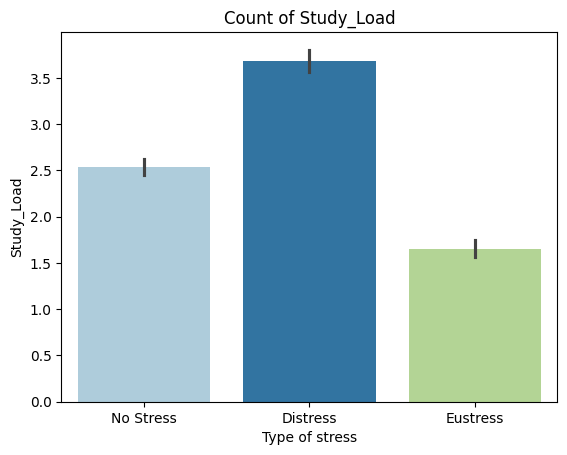

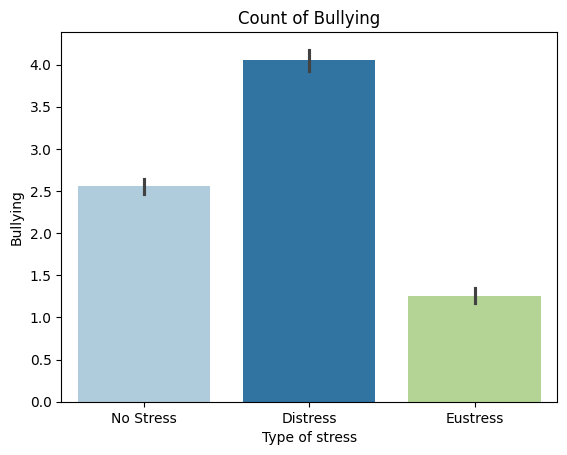

In [106]:
# Create a list with Situations where Distress would be highest
top_condition_type = ['anxiety_level','depression','study_load','bullying']

#bar plot 
for condition in top_condition_type:
    sns.barplot(data=stress_data, x='stress_level_label',y=condition, hue="stress_level_label",legend=False,palette='Paired')
    plt.title(f"Count of {condition.title()}")
    plt.xlabel("Type of stress")
    plt.ylabel(condition.title())
    plt.show()

The above Situations in dayily life are increasing the Distress in the Students 

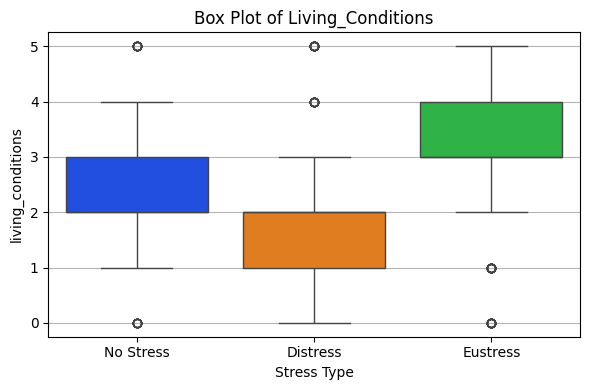

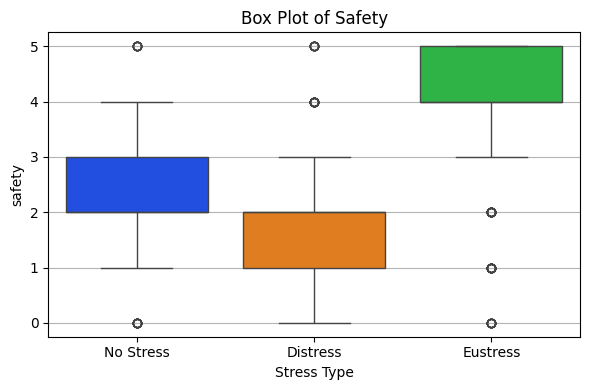

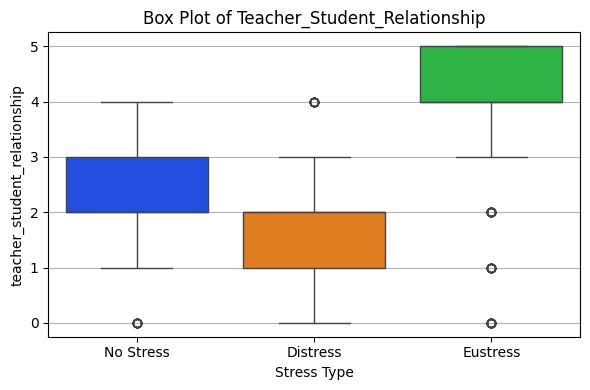

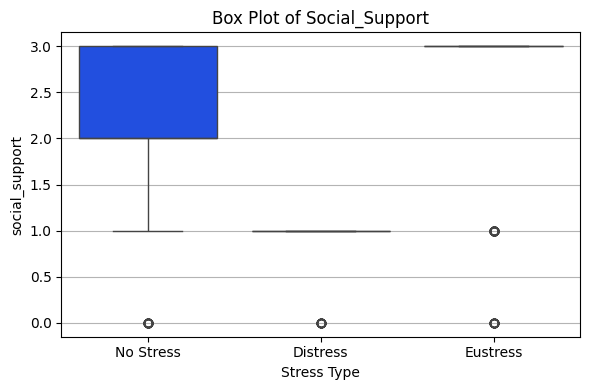

In [107]:
# List where Eustress situation would be highest
top_eustress_situation = ['living_conditions','safety','teacher_student_relationship','social_support']

#Box Plot 
for situation in top_eustress_situation:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=stress_data, x='stress_level_label', y=situation, hue='stress_level_label', legend=False, palette='bright')
    plt.title(f"Box Plot of {situation.title()}")
    plt.xlabel("Stress Type")
    plt.ylabel(situation)
    plt.grid(axis='y', alpha=0.95)
    plt.tight_layout()
    plt.show()

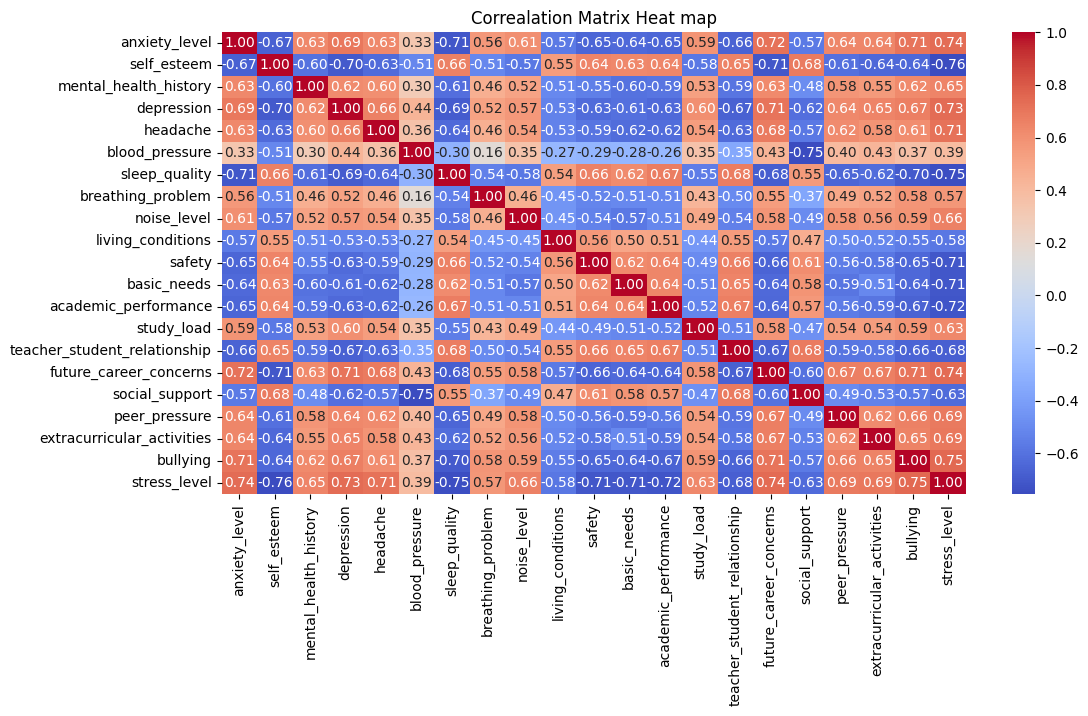

In [108]:
# Correlation 
corr_matrix = stress_data.corr(numeric_only='number')

#Heat map
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correalation Matrix Heat map")
plt.show()

Lets Use Wrapper Methods to remove some of the columns

# 3.Data Preprocessing

In [109]:

# import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = stress_data.iloc[:,:-2]
y = stress_data.iloc[:,-2]

# create model
model = RandomForestClassifier()

# selection
selector = RFE(model, n_features_to_select=10)
selector.fit(X,y)
selected_features = X.columns[selector.support_]
print(selected_features)

Index(['self_esteem', 'depression', 'blood_pressure', 'sleep_quality',
       'safety', 'basic_needs', 'academic_performance',
       'future_career_concerns', 'social_support',
       'extracurricular_activities'],
      dtype='object')


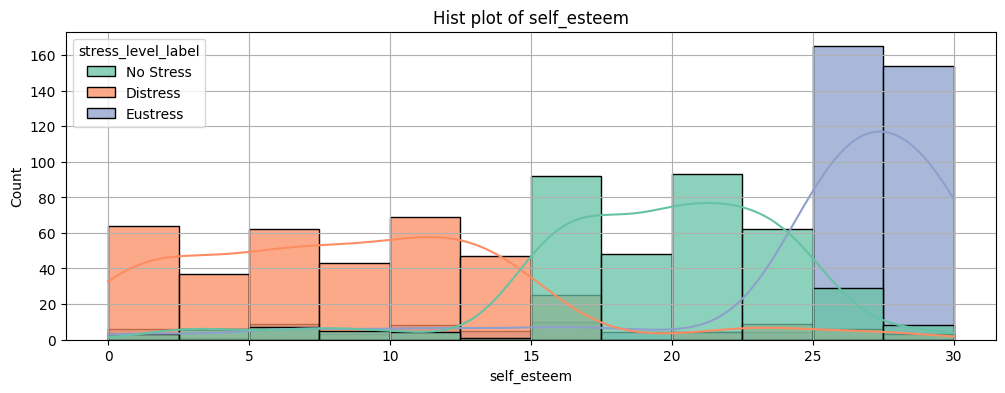

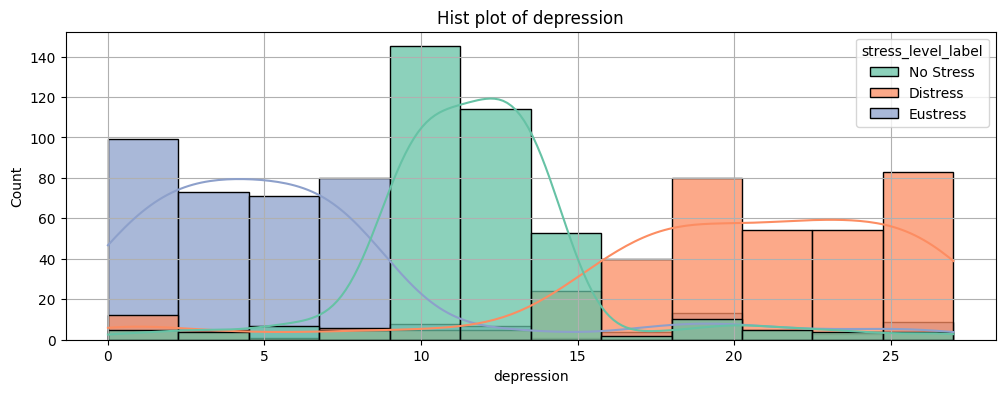

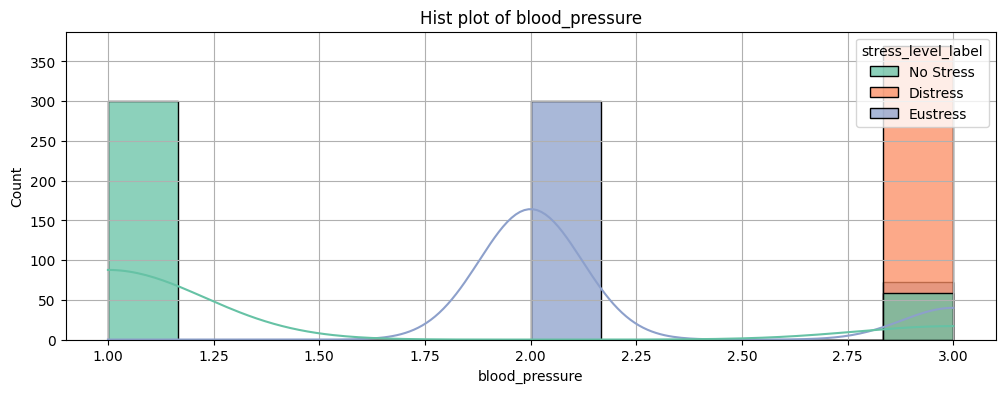

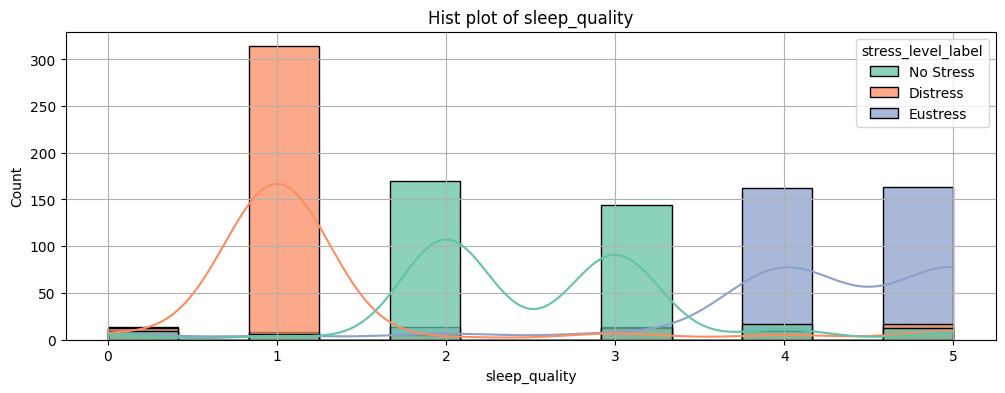

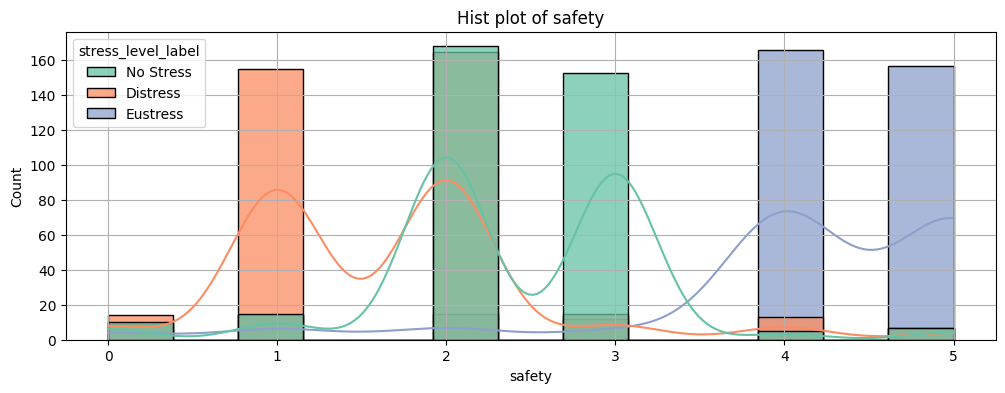

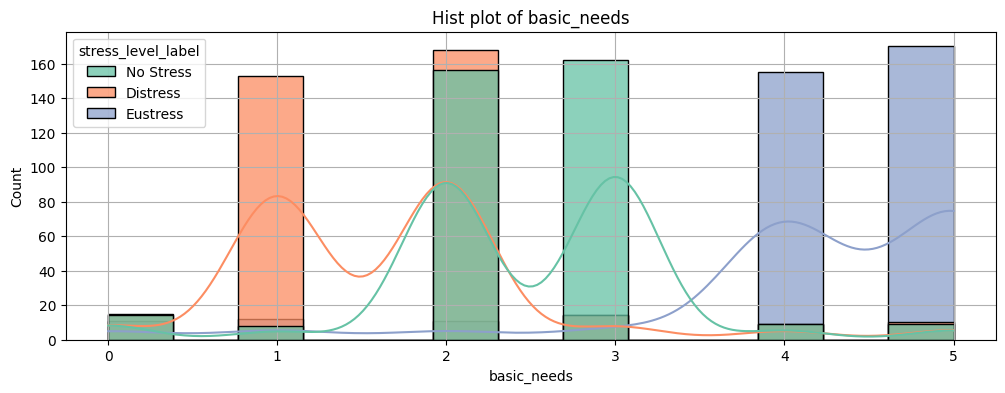

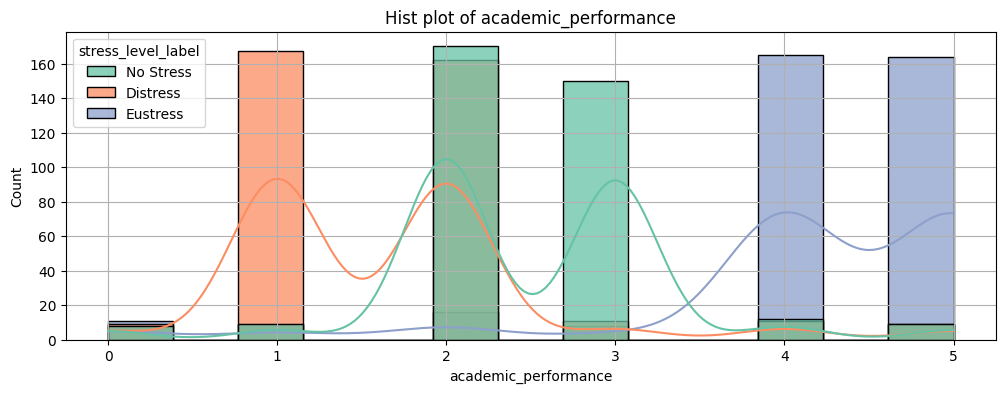

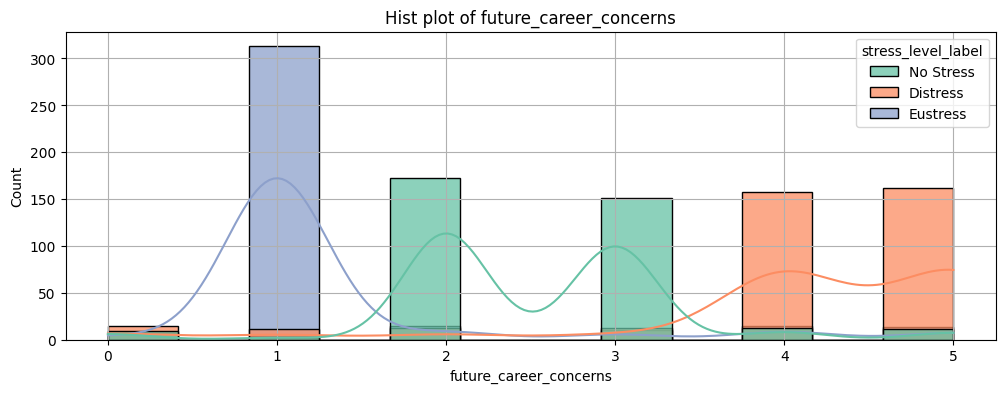

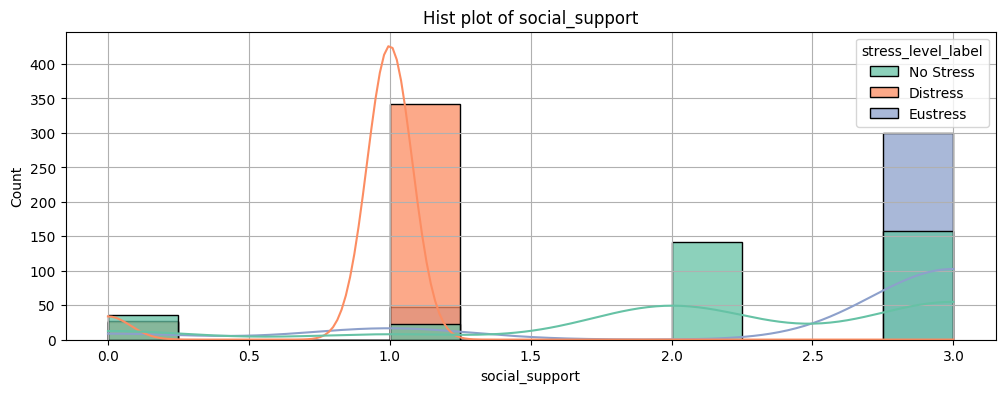

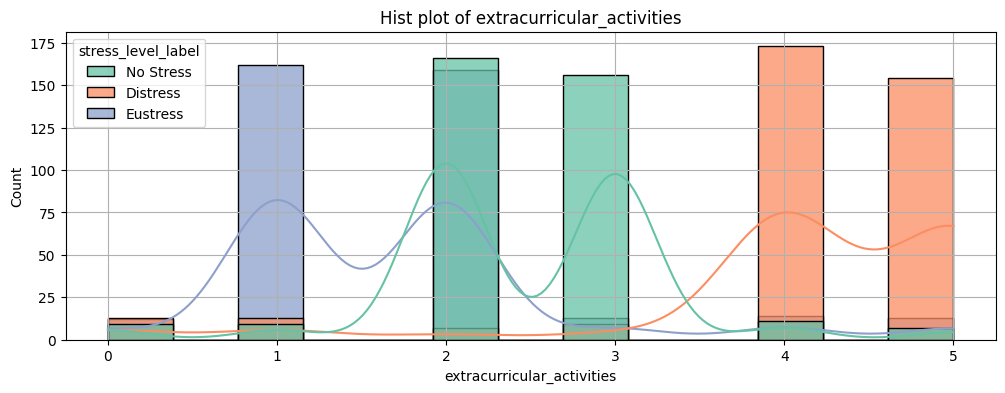

In [110]:
# Check for outliers
for feature in selected_features:
    plt.figure(figsize=(12,4))
    sns.histplot(data=stress_data, x=feature, hue='stress_level_label', kde=True, alpha=0.75, palette='Set2')
    plt.title(f"Hist plot of {feature}")
    plt.grid(True)
    plt.show()

# 3. Machine learning algorithms

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_selected = X[selected_features]

#train test split
X_train , X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# fit the model
model.fit(X_train, y_train)

#Predit
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Models Accuracy Score: {accuracy_score(y_test,y_pred)}\n")
print(f"Models Classification Report: \n{classification_report(y_test, y_pred)}")

Models Accuracy Score: 0.8681818181818182

Models Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        76
           1       0.91      0.86      0.89        73
           2       0.83      0.85      0.84        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



In [112]:
# Select different models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# create a dict
models = {
    "Descision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Logestic Regression": LogisticRegression(max_iter=500),
    "K-neibhors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC()
    }

#loop thorugh models
for name, model_name in models.items():
    model_name.fit(X_train, y_train)
    y_predicted = model_name.predict(X_test)
    score = accuracy_score(y_test, y_predicted)
    print(f"{name} : {score}")
    print("-"*50)
    

Descision Tree : 0.8636363636363636
--------------------------------------------------
Random Forest : 0.8681818181818182
--------------------------------------------------
Logestic Regression : 0.8727272727272727
--------------------------------------------------
K-neibhors : 0.8863636363636364
--------------------------------------------------
Support Vector Classifier : 0.8954545454545455
--------------------------------------------------


/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sk